<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/custom/custom_prompt_evals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Building Custom Prompt Evaluations using UpTrain</h1>

Each LLM application has its unique needs and it is not possible to have a one-size-fits-all evaluation tool. A sales assistant bot needs to be evaluated differently as compared to a calendar automation bot. Even if both the LLM applications want to evaluate for conciseness, the developers need the capability to customize the evaluation prompt to focus on different aspects, most importantly for their end users.

To accommodate such cases, UpTrain allows developers to create a custom prompt evaluation by defining:

| Column Name | Description |
| ----------- | ----------- |
| prompt | Evaluation prompt used to generate the grade |
| choices | List of choices/grades to choose from |
| choices_scores | Scores associated with each choice |
| eval_type | One of ["classify", "cot_classify"], determining if chain-of-thought prompting is to be applied or not |
| prompt_var_to_column_mapping | Optional mapping between variables defined in the prompt vs column names in the data |


**Why only grading evals?**

While LLM-as-a-judge is a promising approach to evaluating LLM applications, asking the LLM to score a certain response comes with its limitations. Asking the LLM to generate a score (say between 1 to 100) can be highly inconsistent (i.e. multiple runs can give vastly different scores) as well as can be ridden with bias (LLMs have a preference for certain numbers as compared to others).

To combat these, we transform the scoring problem into a classification problem, i.e. asking the LLM to choose among given N grades. This leads to much better reliability and higher quality scores.

 
If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).
 

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define the custom evaluation scenario

In [11]:
prompt = """
You are an expert medical school professor specializing in grading students' answers to questions.
You are grading the following question:
{question}
Here is the real answer:
{ground_truth}
You are grading the following predicted answer:
{response}
"""

choices = ["Correct", "Correct but Incomplete", "Incorrect"]
choice_scores = [1.0, 0.5, 0.0]

## Step 3: Let's define our dataset to run evaluations upon

In [12]:
data = [{
      "user_question": "What causes diabetes?",
      "ground_truth_response": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "user_response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity."
   },
   {
      "user_question": "How is pneumonia treated?",
      "ground_truth_response": "Pneumonia is an infection that inflames the air sacs in one or both lungs. It is typically treated with antibiotics, rest, and supportive care. The choice of antibiotics depends on the type of pneumonia and its severity.",
      "user_response": "Pneumonia is typically treated with antibiotics, rest, and supportive care. The choice of antibiotics depends on the type of pneumonia and its severity."
   },
   {
      "user_question": "Is the flu vaccine effective?",
      "ground_truth_response": "The influenza vaccine is recommended to prevent seasonal flu. Yes, the flu vaccine is generally effective in preventing or reducing the severity of influenza. However, its effectiveness can vary based on factors such as age and the match between the vaccine and circulating flu strains.",
      "user_response": "Yes, the flu vaccine is generally effective in preventing or reducing the severity of influenza. However, its effectiveness can vary based on factors such as age and the match between the vaccine and circulating flu strains."
   },
   {
      "user_question": "What are the symptoms of a heart attack?",
      "ground_truth_response": "A heart attack, or myocardial infarction, occurs when the blood supply to the heart muscle is blocked. Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back.",
      "user_response": "Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back."
   },
   {
      "user_question": "Can stress cause physical health problems?",
      "ground_truth_response": "Stress is the body's response to challenges or threats. Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system.",
      "user_response": "Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system."
}]

prompt_var_to_column_mapping = {
    "question": "user_question",
    "ground_truth": "ground_truth_response",
    "response": "user_response"
}

## Step 4: Running evaluations using UpTrain's Open-Source Software (OSS)

In [13]:
from uptrain import CustomPromptEval, EvalLLM, Settings
import json

OPENAI_API_KEY = "sk-*****************"  # Insert your OpenAI key here
eval_llm = EvalLLM(settings=Settings(openai_api_key=OPENAI_API_KEY, response_format={"type":"json_object"}))

results = eval_llm.evaluate(
    data = data,
    checks = [CustomPromptEval(
        prompt = prompt,
        choices = choices,
        choice_scores = choice_scores,
        prompt_var_to_column_mapping = prompt_var_to_column_mapping
    )]
)    

2024-01-28 22:53:48.956 | WARNING  | uptrain.operators.language.llm:fetch_responses:152 - Detected a running event loop, scheduling requests in a separate thread.
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.00it/s]


In [4]:
print(json.dumps(results,indent=3))

[
   {
      "question": "What causes diabetes?",
      "ground_truth": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "Choice": "CORRECT BUT INCOMPLETE",
      "Explanation": "The predicted answer correctly identifies the primary causes of diabetes as genetic and environmental factors, including obesity and lack of physical activity. However, it does not mention that diabetes is a metabolic disorder characterized by high blood sugar levels, which is an important aspect of the real answer.",
      "score_custom_prompt": 0.5
   },
   {
      "question": "How is pneumonia treated?",
      "ground_truth": "Pneumonia is an infection that inflames the air sacs in one or both lun

## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [6]:
from uptrain import APIClient, CustomPromptEval, Settings
import json

UPTRAIN_API_KEY = "up-******************"  # Insert your UpTrain key here

uptrain_client = APIClient(Settings(uptrain_access_token=UPTRAIN_API_KEY, response_format={"type":"json_object"}))

results = uptrain_client.log_and_evaluate(
    project_name = "Sample-custom-evals",
    data = data,
    checks = [CustomPromptEval(
        prompt = prompt,
        choices = choices,
        choice_scores = choice_scores,
        prompt_var_to_column_mapping = prompt_var_to_column_mapping
    )]
)

2024-01-25 15:22:53.799 | INFO     | uptrain.framework.remote:log_and_evaluate:507 - Sending evaluation request for rows 0 to <50 to the Uptrain server


### Dashboards: 
Histogram of score vs number of cases with that score

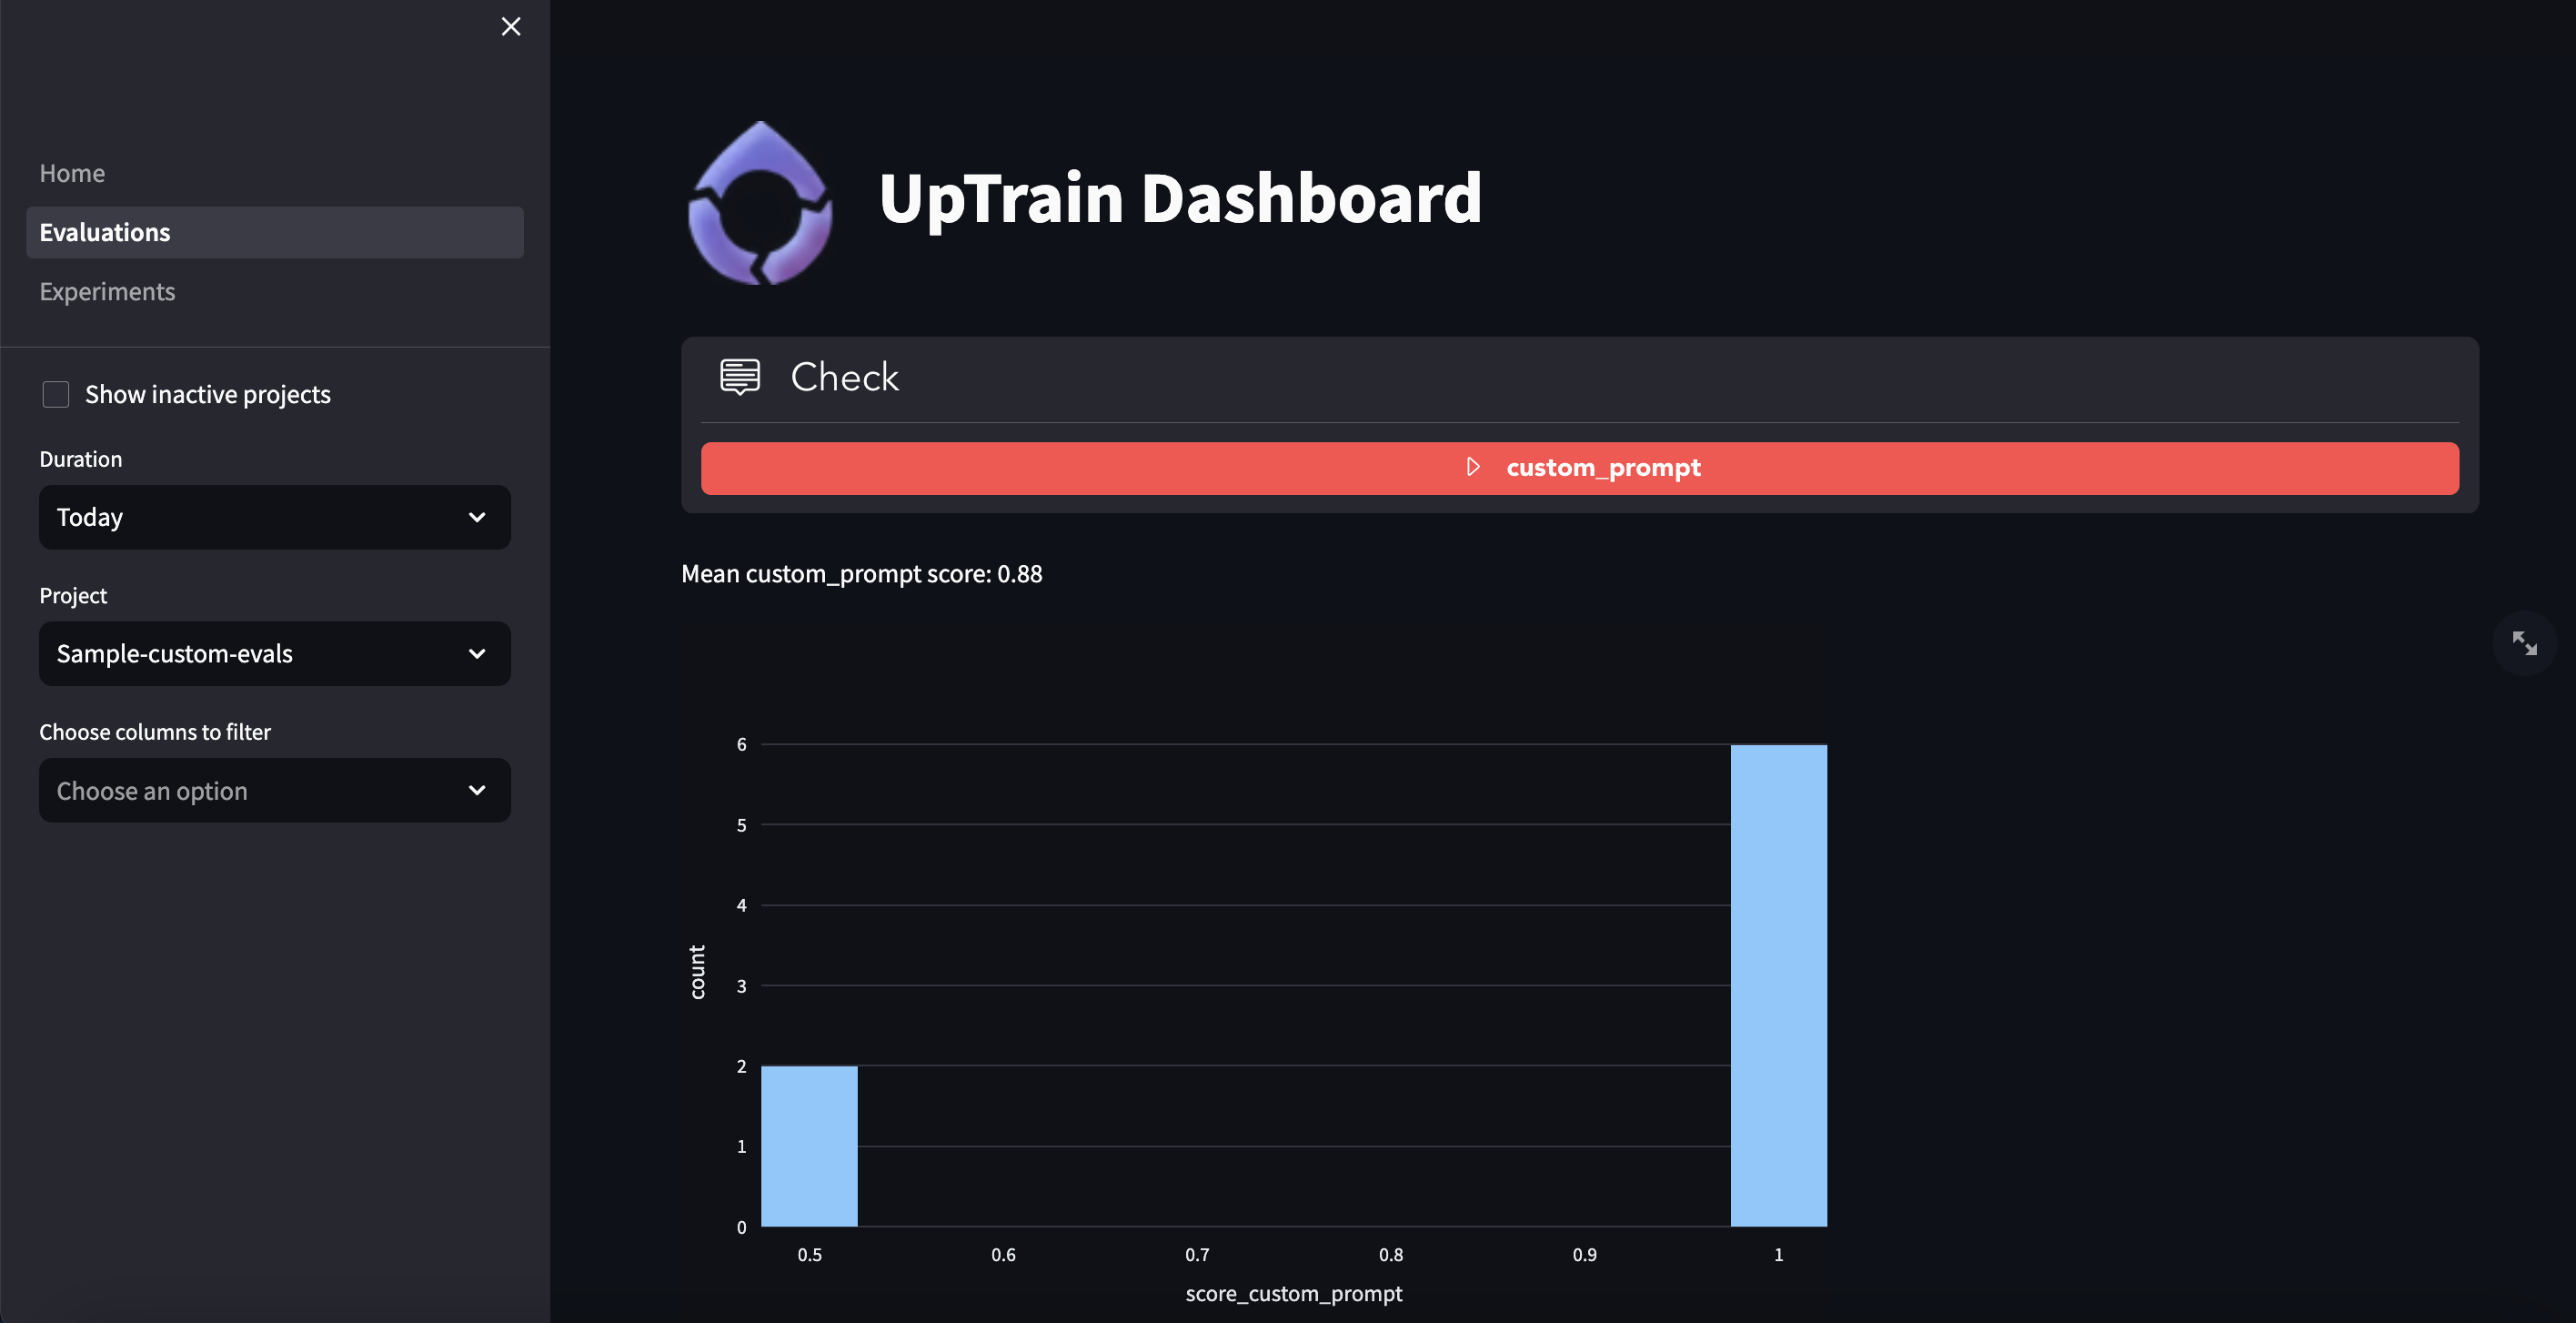

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

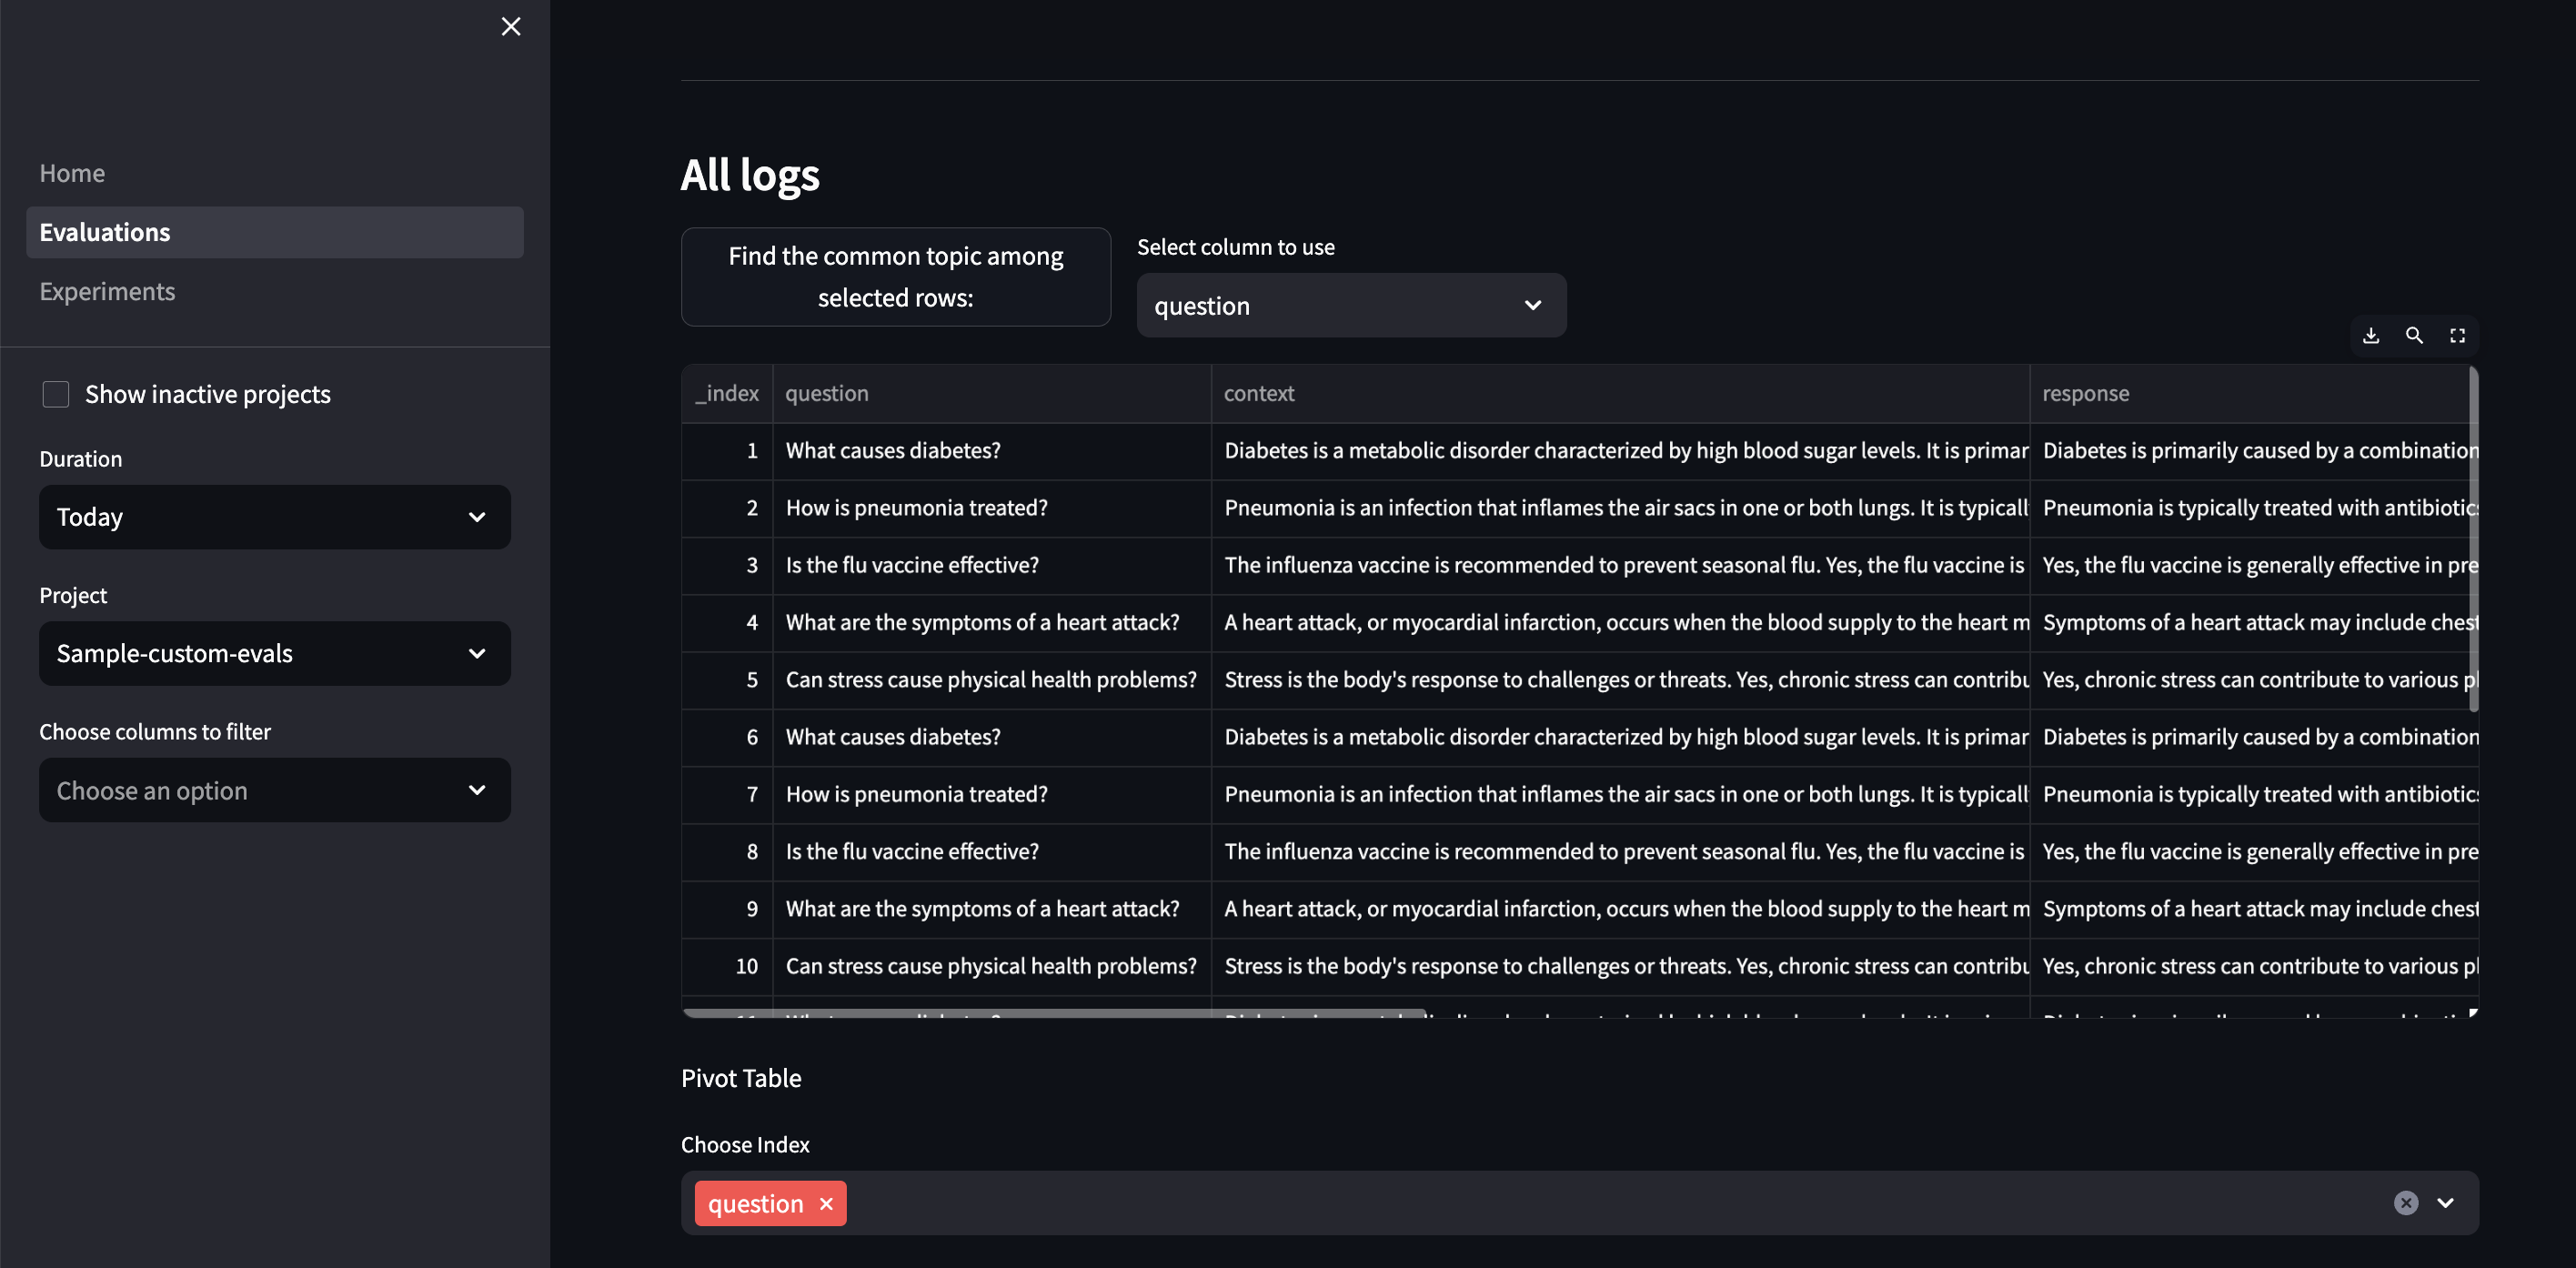